In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data1=pd.read_csv('Mannar.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Jaffna.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Kandy.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data4=pd.read_csv('Polonnaruwa.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data4 = data4.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data5 = pd.read_csv('Kanthale.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data5 = data5.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data6 = pd.read_csv('Kilinochchi.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data6 = data6.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data7=pd.read_csv('PointPedro.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data7 = data7.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data8 = pd.read_csv('Anuradhapura.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data8 = data8.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data9 = pd.read_csv('Mullativu.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data9 = data9.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data_list=[data1,data2,data3,data4,data5,data6,data7,data8,data9]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
print(len (data))
#data.reset_index(drop=True, inplace=True)
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length=len(data)
data9


42821


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-04-28 00:00:00,8.25,33.15,68.00,0.0,28.0,4.0,4.0
2023-04-28 01:00:00,8.25,32.78,71.00,1.0,28.0,4.0,4.0
2023-04-28 02:00:00,8.25,32.67,69.25,2.0,28.0,4.0,4.0
2023-04-28 03:00:00,9.00,32.58,69.25,3.0,28.0,4.0,4.0
2023-04-28 04:00:00,9.00,31.78,72.50,4.0,28.0,4.0,4.0
...,...,...,...,...,...,...,...
2023-10-12 10:00:00,9.25,33.67,65.00,10.0,12.0,3.0,10.0
2023-10-12 11:00:00,10.25,34.92,61.75,11.0,12.0,3.0,10.0
2023-10-12 12:00:00,10.25,35.78,58.25,12.0,12.0,3.0,10.0


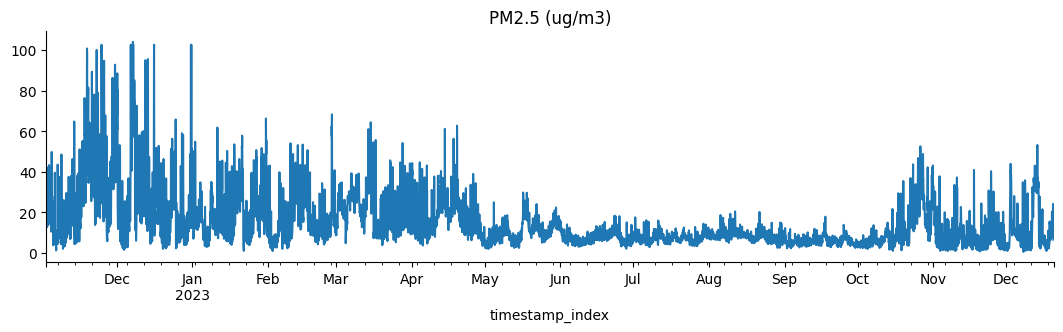

In [3]:
data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
train_data = data.iloc[:int(Length*0.8)]
#val_data = data.iloc[int(Length*0.6):int(Length*0.8)]
test_data = data.iloc[int(Length*0.8):]
test_data


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-09-28 18:00:00,6.62500,32.68250,62.31875,18.0,28.0,3.0,9.0
2023-09-28 19:00:00,5.35625,32.18000,64.44375,19.0,28.0,3.0,9.0
2023-09-28 20:00:00,4.90625,31.89125,65.68750,20.0,28.0,3.0,9.0
2023-09-28 21:00:00,4.20000,31.70125,66.53125,21.0,28.0,3.0,9.0
2023-09-28 22:00:00,4.04375,31.44000,67.16250,22.0,28.0,3.0,9.0
...,...,...,...,...,...,...,...
2023-12-20 06:00:00,18.62500,28.41500,83.00000,6.0,20.0,2.0,12.0
2023-12-20 07:00:00,15.37500,28.46500,83.62500,7.0,20.0,2.0,12.0
2023-12-20 08:00:00,13.25000,29.17500,82.87500,8.0,20.0,2.0,12.0


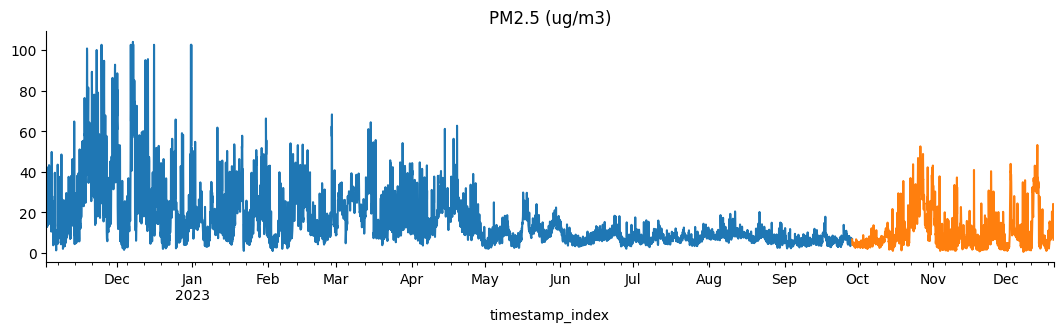

In [8]:
train_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
test_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
model_predictions = []

X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']
X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
y_test = test_data['PM2.5 (ug/m3)']

y_train

timestamp_index
2022-11-02 00:00:00    18.75000
2022-11-02 01:00:00    20.00000
2022-11-02 02:00:00    20.75000
2022-11-02 03:00:00    35.67000
2022-11-02 04:00:00    28.50000
                         ...   
2023-09-28 13:00:00     6.00000
2023-09-28 14:00:00     5.85625
2023-09-28 15:00:00     5.89625
2023-09-28 16:00:00     6.56250
2023-09-28 17:00:00     6.61875
Name: PM2.5 (ug/m3), Length: 7938, dtype: float64

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the initial training data
rf_model.fit(X_train, y_train)

# Initialize a list to store model predictions
model_predictions = []

for i in range(len(y_test)):

  y_pred = rf_model.predict(X_test.iloc[[i]])

  model_predictions.append(y_pred)

  #X_train = X_train.append(X_test.iloc[[i]])
  #y_train = y_train.append(pd.Series(y_test.iloc[i]))
  X_train = pd.concat([X_train, X_test.iloc[[i]]], axis=0)
  y_train = pd.concat([y_train, pd.Series(y_test.iloc[i])], axis=0)

  rf_model.fit(X_train, y_train)
  '''if(i>100):
    break'''
  print(i)

print(model_predictions)

0
1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [ ]:
print(model_fit.summary())

print(len(model_predictions))

2002
[array([13.125]), array([9.8725]), array([7.75]), array([11.3025]), array([6.6525]), array([7.5525]), array([7.2825]), array([8.505]), array([3.5775]), array([7.6625]), array([6.3675]), array([7.8875]), array([11.655]), array([11.31]), array([15.1225]), array([5.765]), array([4.9775]), array([11.8275]), array([18.1825]), array([10.7975]), array([10.9225]), array([2.555]), array([10.3575]), array([2.665]), array([9.11]), array([10.2875]), array([9.59]), array([3.5825]), array([12.94]), array([8.0975]), array([2.7825]), array([5.0675]), array([6.5675]), array([2.9575]), array([4.635]), array([5.6525]), array([2.6125]), array([2.86]), array([6.565]), array([6.065]), array([11.3]), array([6.1675]), array([4.1975]), array([6.555]), array([11.095]), array([3.31]), array([4.095]), array([10.9725]), array([6.9975]), array([14.465]), array([10.78]), array([3.8375]), array([12.5875]), array([6.2375]), array([14.375]), array([5.7625]), array([18.1825]), array([8.4575]), array([7.4825]), arra

In [ ]:
for i in range(2001,):

  y_pred = rf_model.predict(X_test.iloc[[i]])

  model_predictions.append(y_pred)

  #X_train = X_train.append(X_test.iloc[[i]])
  #y_train = y_train.append(pd.Series(y_test.iloc[i]))
  X_train = pd.concat([X_train, X_test.iloc[[i]]], axis=0)
  y_train = pd.concat([y_train, pd.Series(y_test.iloc[i])], axis=0)

  rf_model.fit(X_train, y_train)
  print(i)
  if(i>3000):
    break
print(model_predictions)

1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700


In [ ]:
print(len(model_predictions))
print(model_predictions)

2002
[array([13.125]), array([9.8725]), array([7.75]), array([11.3025]), array([6.6525]), array([7.5525]), array([7.2825]), array([8.505]), array([3.5775]), array([7.6625]), array([6.3675]), array([7.8875]), array([11.655]), array([11.31]), array([15.1225]), array([5.765]), array([4.9775]), array([11.8275]), array([18.1825]), array([10.7975]), array([10.9225]), array([2.555]), array([10.3575]), array([2.665]), array([9.11]), array([10.2875]), array([9.59]), array([3.5825]), array([12.94]), array([8.0975]), array([2.7825]), array([5.0675]), array([6.5675]), array([2.9575]), array([4.635]), array([5.6525]), array([2.6125]), array([2.86]), array([6.565]), array([6.065]), array([11.3]), array([6.1675]), array([4.1975]), array([6.555]), array([11.095]), array([3.31]), array([4.095]), array([10.9725]), array([6.9975]), array([14.465]), array([10.78]), array([3.8375]), array([12.5875]), array([6.2375]), array([14.375]), array([5.7625]), array([18.1825]), array([8.4575]), array([7.4825]), arra

In [ ]:


# Assuming your test data is stored in DataFrame test_data with features and actual PM2.5 values
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
#y_test = test_data['PM2.5 (ug/m3)']  # Actual PM2.5 values


# Calculate evaluation metrics
mae = mean_absolute_error(y_test[0:2002], model_predictions)
mse = mean_squared_error(y_test[0:2002], model_predictions)
rmse = mean_squared_error(y_test[0:2002], model_predictions, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.0893575924075924
Mean Squared Error (MSE): 27.316972862262737
Root Mean Squared Error (RMSE): 5.226564154610822


In [ ]:


# Make predictions using the trained model
y_pred = rf_model.predict(X_test)
y_pred
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.875737817189631
Mean Squared Error (MSE): 57.99810870571078
Root Mean Squared Error (RMSE): 7.615648935298342


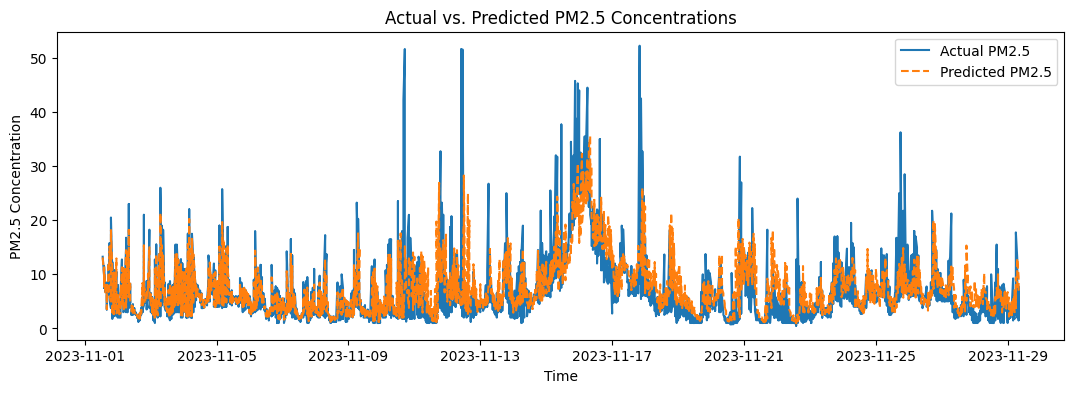

In [ ]:
pred_df = pd.DataFrame(model_predictions, index=y_test.index[0:2002], columns=['Predicted PM2.5'])
#pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted PM2.5'])

# Plot actual vs. predicted values
plt.figure(figsize=(13, 4))
plt.plot(y_test[0:2002], label='Actual PM2.5')
#plt.plot(y_test, label='Actual PM2.5')
plt.plot(pred_df, label='Predicted PM2.5', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5 Concentrations')
plt.legend()
plt.show()


In [ ]:
#X_train = train_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']  # Target variable

# Instantiate the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
print(model_fit.summary())

print(len(model_predictions))

In [ ]:
model_fit.save("ARIMA model 2,1,1 cluster 3.pkl")

NameError: name 'model_fit' is not defined

import statsmodels.api as sm
loaded_model = sm.load("ARIMA model 2,1,1 cluster 3.pkl")

In [ ]:
loaded_model.summary()